<a href="https://colab.research.google.com/github/conexaomundom/TCC---Demographic-Categorial-Ordinal-Data-Regression-Model/blob/main/Categorical_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
########## MODELO PARA DADOS CATEGORICOS ORDINAIS  ##########

%load_ext rpy2.ipython



The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [34]:
%%R
install.packages("MASS")
install.packages("sure")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpNPFlYY/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpNPFlYY/downloaded_packages’



In [35]:
%%R
load("/content/PB2016.Rda")
PB2016 <- PB2016[(which(PB2016$`Faixa Remun Média (SM)` != 99)), ] # 11774
PB2016$`Raça Cor`[which(PB2016$`Raça Cor` == 9)] <- 99
nrow(PB2016)

[1] 819849


In [36]:
# probit

%%R
library("MASS")
PB2016$`Faixa Etária`[which(PB2016$`Faixa Etária` == 2)] <- 1

#                                          Estimate  Std. Error   t value   Pr(>|t|)
# as.factor(`Faixa Etária`)2            -0.00367368  0.02665775   -0.1378   0.8903914
modelo_polr <- polr(as.factor(`Faixa Remun Média (SM)`) ~ as.factor(`Sexo Trabalhador`) +
                      as.factor(`Faixa Etária`) +  as.factor(`Escolaridade após 2005`) +
                      `Qtd Hora Contr` + as.factor(`Raça Cor`), data = PB2016,
                       method = "probit")

In [37]:
%%R
install.packages("lmtest")



(as ‘lib’ is unspecified)







	‘/tmp/RtmpNPFlYY/downloaded_packages’



In [38]:
%%R
library(lmtest)
round(coeftest(modelo_polr),4)



Re-fitting to get Hessian





t test of coefficients:

                                      Estimate Std. Error   t value Pr(>|t|)
as.factor(`Sexo Trabalhador`)2         -0.2788     0.0025 -110.6248   <2e-16
as.factor(`Faixa Etária`)3              0.7826     0.0299   26.1862   <2e-16
as.factor(`Faixa Etária`)4              1.0799     0.0299   36.1183   <2e-16
as.factor(`Faixa Etária`)5              1.2885     0.0298   43.1958   <2e-16
as.factor(`Faixa Etária`)6              1.4067     0.0299   47.0874   <2e-16
as.factor(`Faixa Etária`)7              1.6646     0.0299   55.6260   <2e-16
as.factor(`Faixa Etária`)8              1.9351     0.0314   61.7236   <2e-16
as.factor(`Faixa Etária`)99             1.3843     0.0010 1356.2199   <2e-16
as.factor(`Escolaridade após 2005`)2    0.2275     0.0131   17.4033   <2e-16
as.factor(`Escolaridade após 2005`)3    0.1937     0.0139   13.9522   <2e-16
as.factor(`Escolaridade após 2005`)4    0.2675     0.0129   20.7697   <2e-16
as.factor(`Escolaridade após 2005`)5    0.4955    

In [10]:
%%R
length(as.numeric(PB2016$`Faixa Remun Média (SM)`)) # 819849
length(modelo_polr$fitted.values) #9838188
# para as 12 variáveis 9838188/819849 = 12

fit <- fitted(modelo_polr)


fit_df <- as.data.frame(fit)

In [11]:
%%R
# O que antes era probabilidade agora é classificacao.
y_hat <- NULL
for(i in 1:nrow(fit)){
    coluna <- NA
    for(j in 1:ncol(fit)){
      if(max(fit[i, ]) == fit[i,j]) coluna <- j
    }
  y_hat[i] <- coluna
}
levels(as.factor(y_hat))

[1] "2"  "3"  "5"  "10" "12"


In [12]:
%%R
install.packages("xtable")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpNPFlYY/downloaded_packages’



In [ ]:
%%R
library(xtable)
table(PB2016$`Faixa Remun Média (SM)`, y_hat)
xtable(table(PB2016$`Faixa Remun Média (SM)`, y_hat))

% latex table generated in R 4.4.2 by xtable 1.8-4 package
% Mon Dec  9 02:27:12 2024
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrr}
  \hline
 & 2 & 3 & 5 & 10 & 12 \\ 
  \hline
0 & 480 & 5462 & 195 &   0 &   1 \\ 
  1 & 1408 & 100958 & 2602 &   2 &  20 \\ 
  2 & 478 & 384164 & 8689 &   2 &  34 \\ 
  3 &  32 & 108076 & 5924 &   0 &  32 \\ 
  4 &  15 & 88058 & 11504 &   4 &  46 \\ 
  5 &   2 & 27726 & 7511 &   2 &  48 \\ 
  6 &   1 & 11651 & 4392 &   4 &  35 \\ 
  7 &   2 & 13547 & 5202 &   4 &  68 \\ 
  8 &   0 & 7521 & 4741 &   5 & 121 \\ 
  9 &   0 & 4869 & 5683 &   4 & 351 \\ 
  10 &   0 & 1731 & 2577 &   5 & 188 \\ 
  11 &   0 & 1500 & 2057 &   6 & 109 \\ 
   \hline
\end{tabular}
\end{table}


In [18]:
%%R
BIC(modelo_polr)


[1] 2501778


In [19]:
%%R
install.packages("PResiduals")
install.packages("ggplot2")



(as ‘lib’ is unspecified)







	‘/tmp/RtmpNPFlYY/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpNPFlYY/downloaded_packages’



In [20]:
%%R
library(PResiduals)
pres <- presid(modelo_polr)
# residuos vs covariancia
# plot e Q-Q Plot
library(ggplot2)

In [16]:
%%R
install.packages("grid.arrange")

(as ‘lib’ is unspecified)



`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


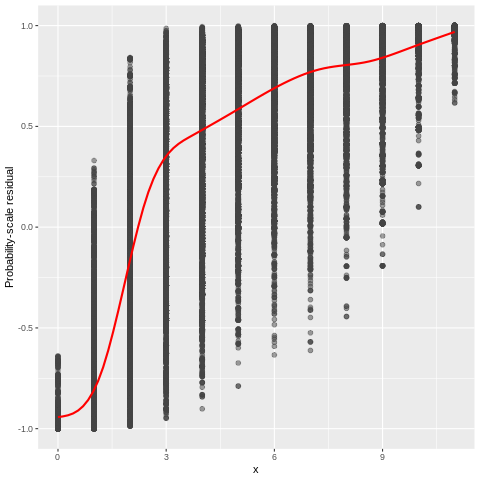

In [15]:
%%R
#library("grid.arrange")
p1 <- ggplot(data.frame(x = PB2016$`Faixa Remun Média (SM)`, y = pres), aes(x, y)) +
geom_point(color = "#444444", shape = 19, size = 2, alpha = 0.5) +
geom_smooth(color = "red", se = FALSE) +
ylab("Probability-scale residual")

p2 <- ggplot(data.frame(y = pres), aes(sample = y)) +
stat_qq(distribution = qunif, dparams = list(min = -1, max = 1), alpha = 0.5) +
stat_qq_line(colour = "red", dparams = list(min = -1, max = 1), alpha = 0.5) +
xlab("Sample quantile") +
ylab("Theoretical quantile")

#grid.arrange(p1, p2, ncol = 2) # Figure 1
p1

# probit

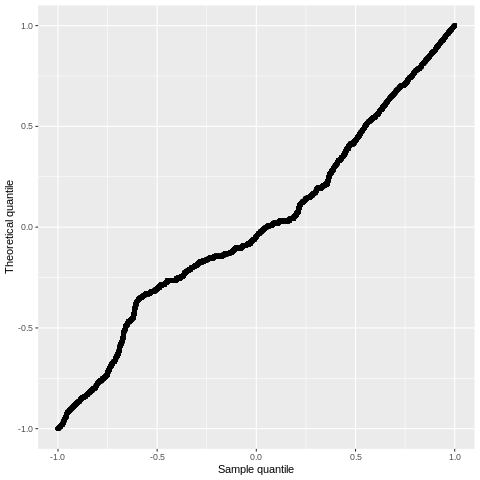

In [21]:
%%R

p2

In [ ]:
%%R
library(sure)
set.seed(2021)
sres <- resids(modelo_polr)

In [ ]:
%%R
set.seed(101)
sres <- resids(modelo_polr)
# Residual-vs-covariate plot and Q-Q plot
library(ggplot2) # needed for autoplot function
p3 <- sure::autoplot.resid(resids(modelo_polr), what = "covariate",
              x = PB2016$`Faixa Remun Média (SM)`)
p4 <- ggplot(data.frame(sres), aes(sample = sres)) +
  stat_qq() + stat_qq_line(colour = "red")

p3

In [ ]:
p4

MODELO LOGISTIC

In [28]:
%%R
modelo_polr_logistic <- polr(as.factor(`Faixa Remun Média (SM)`) ~
                        as.factor(`Sexo Trabalhador`) +
                      as.factor(`Faixa Etária`) +  as.factor(`Escolaridade após 2005`) +
                      `Qtd Hora Contr` + as.factor(`Raça Cor`), data = PB2016,
                     method = "logistic")

In [29]:
%%R
length(as.numeric(PB2016$`Faixa Remun Média (SM)`)) # 819849
length(modelo_polr_logistic$fitted.values) #9838188
# para as 12 variáveis 9838188/819849 = 12

fit1 <- fitted(modelo_polr_logistic)


fit1_df <- as.data.frame(fit1)

In [30]:
%%R
# O que antes era probabilidade agora é classificacao.
y_hat1 <- NULL
for(i in 1:nrow(fit1)){
    coluna <- NA
    for(j in 1:ncol(fit1)){
      if(max(fit1[i, ]) == fit1[i,j]) coluna <- j
    }
  y_hat1[i] <- coluna
}
levels(as.factor(y_hat1))

[1] "2"  "3"  "5"  "10" "12"


In [31]:
%%R
library(xtable)
table(PB2016$`Faixa Remun Média (SM)`, y_hat)
xtable(table(PB2016$`Faixa Remun Média (SM)`, y_hat))

% latex table generated in R 4.4.2 by xtable 1.8-4 package
% Mon Dec  9 23:50:47 2024
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrr}
  \hline
 & 2 & 3 & 5 & 10 & 12 \\ 
  \hline
0 & 480 & 5462 & 195 &   0 &   1 \\ 
  1 & 1408 & 100958 & 2602 &   2 &  20 \\ 
  2 & 478 & 384164 & 8689 &   2 &  34 \\ 
  3 &  32 & 108076 & 5924 &   0 &  32 \\ 
  4 &  15 & 88058 & 11504 &   4 &  46 \\ 
  5 &   2 & 27726 & 7511 &   2 &  48 \\ 
  6 &   1 & 11651 & 4392 &   4 &  35 \\ 
  7 &   2 & 13547 & 5202 &   4 &  68 \\ 
  8 &   0 & 7521 & 4741 &   5 & 121 \\ 
  9 &   0 & 4869 & 5683 &   4 & 351 \\ 
  10 &   0 & 1731 & 2577 &   5 & 188 \\ 
  11 &   0 & 1500 & 2057 &   6 & 109 \\ 
   \hline
\end{tabular}
\end{table}


In [32]:
%%R
library(lmtest)
round(coeftest(modelo_polr_logistic),4)

Re-fitting to get Hessian





t test of coefficients:

                                      Estimate Std. Error   t value Pr(>|t|)
as.factor(`Sexo Trabalhador`)2         -0.5188     0.0045 -115.8380   <2e-16
as.factor(`Faixa Etária`)3              1.6316     0.0543   30.0405   <2e-16
as.factor(`Faixa Etária`)4              2.1555     0.0543   39.6623   <2e-16
as.factor(`Faixa Etária`)5              2.5263     0.0542   46.5796   <2e-16
as.factor(`Faixa Etária`)6              2.7342     0.0543   50.3415   <2e-16
as.factor(`Faixa Etária`)7              3.1766     0.0544   58.3805   <2e-16
as.factor(`Faixa Etária`)8              3.7174     0.0572   65.0164   <2e-16
as.factor(`Faixa Etária`)99             2.7272     0.0020 1371.0243   <2e-16
as.factor(`Escolaridade após 2005`)2    0.3952     0.0227   17.3770   <2e-16
as.factor(`Escolaridade após 2005`)3    0.3411     0.0241   14.1595   <2e-16
as.factor(`Escolaridade após 2005`)4    0.4691     0.0224   20.9383   <2e-16
as.factor(`Escolaridade após 2005`)5    0.7761    

In [45]:
%%R
BIC(modelo_polr_logistic)

[1] 2489708


In [46]:
%%R
library(PResiduals)
pres_logistic <- presid(modelo_polr_logistic)
# residuos vs covariancia
# plot e Q-Q Plot
library(ggplot2)

In [47]:
%%R
p1_logistic <- ggplot(data.frame(x = PB2016$`Faixa Remun Média (SM)`,
        y = pres_logistic), aes(x, y)) +
    geom_point(color = "#444444", shape = 19, size = 2, alpha = 0.5) +
    geom_smooth(color = "red", se = FALSE) +
    ylab("Escala de probabilidade residual")

p2_logistic <- ggplot(data.frame(y = pres_logistic), aes(sample = y)) +
stat_qq(distribution = qunif, dparams = list(min = -1, max = 1), alpha = 0.5) +
stat_qq_line(colour = "red", dparams = list(min = -1, max = 1), alpha = 0.5) +
xlab("Amostra do quantil") +
ylab("Quantil teórico")

p1

In [ ]:
p2

Modelo LOG LOG

In [16]:
%%R
modelo_polr_loglog <- polr(as.factor(`Faixa Remun Média (SM)`) ~
                        as.factor(`Sexo Trabalhador`) +
                      as.factor(`Faixa Etária`) +  as.factor(`Escolaridade após 2005`) +
                      `Qtd Hora Contr` + as.factor(`Raça Cor`), data = PB2016,
                     method = "loglog")
summary(modelo_polr_loglog)

Re-fitting to get Hessian




Call:
polr(formula = as.factor(`Faixa Remun Média (SM)`) ~ as.factor(`Sexo Trabalhador`) + 
    as.factor(`Faixa Etária`) + as.factor(`Escolaridade após 2005`) + 
    `Qtd Hora Contr` + as.factor(`Raça Cor`), data = PB2016, 
    method = "loglog")

Coefficients:
                                         Value Std. Error  t value
as.factor(`Sexo Trabalhador`)2        -0.20883  0.0025838  -80.822
as.factor(`Faixa Etária`)3             0.46446  0.0305466   15.205
as.factor(`Faixa Etária`)4             0.67842  0.0305672   22.194
as.factor(`Faixa Etária`)5             0.84823  0.0304955   27.815
as.factor(`Faixa Etária`)6             0.94380  0.0305422   30.902
as.factor(`Faixa Etária`)7             1.13440  0.0305963   37.076
as.factor(`Faixa Etária`)8             1.31655  0.0321843   40.907
as.factor(`Faixa Etária`)99            1.08831  0.0010353 1051.211
as.factor(`Escolaridade após 2005`)2   0.19564  0.0133068   14.702
as.factor(`Escolaridade após 2005`)3   0.18948  0.0141301   13.410


In [17]:
%%R
length(as.numeric(PB2016$`Faixa Remun Média (SM)`)) # 819849
length(modelo_polr_loglog$fitted.values) #9838188
# para as 12 variáveis 9838188/819849 = 12

fit2 <- fitted(modelo_polr_loglog)


fit2_df <- as.data.frame(fit2)

In [22]:
%%R
# O que antes era probabilidade agora é classificacao.
y_hat2 <- NULL
for(i in 1:nrow(fit2)){
    coluna <- NA
    for(j in 1:ncol(fit2)){
      if(max(fit2[i, ]) == fit2[i,j]) coluna <- j
    }
  y_hat2[i] <- coluna
}
levels(as.factor(y_hat2))

[1] "1" "2" "3" "5" "8"


In [23]:
%%R
library(xtable)
table(PB2016$`Faixa Remun Média (SM)`, y_hat2)
xtable(table(PB2016$`Faixa Remun Média (SM)`, y_hat2))

% latex table generated in R 4.4.2 by xtable 1.8-4 package
% Mon Dec  9 23:43:03 2024
\begin{table}[ht]
\centering
\begin{tabular}{rrrrrr}
  \hline
 & 1 & 2 & 3 & 5 & 8 \\ 
  \hline
0 &  82 & 1002 & 4980 &  74 &   0 \\ 
  1 & 137 & 2035 & 101988 & 828 &   2 \\ 
  2 &  34 & 907 & 390165 & 2261 &   0 \\ 
  3 &   0 & 213 & 112337 & 1514 &   0 \\ 
  4 &   0 &  75 & 96580 & 2971 &   1 \\ 
  5 &   0 &  15 & 32966 & 2308 &   0 \\ 
  6 &   0 &   9 & 14463 & 1611 &   0 \\ 
  7 &   0 &   6 & 16664 & 2152 &   1 \\ 
  8 &   0 &   2 & 10288 & 2095 &   3 \\ 
  9 &   0 &   0 & 8190 & 2708 &   9 \\ 
  10 &   0 &   0 & 3062 & 1436 &   3 \\ 
  11 &   0 &   0 & 2439 & 1230 &   3 \\ 
   \hline
\end{tabular}
\end{table}


In [24]:
%%R
BIC(modelo_polr_loglog)

[1] 2577280


In [25]:
%%R
library(PResiduals)
pres_loglog <- presid(modelo_polr_loglog)
# residuos vs covariancia
# plot e Q-Q Plot
library(ggplot2)

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


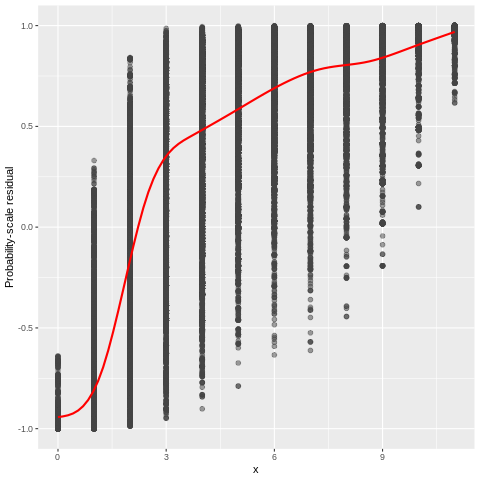

In [26]:
%%R
p1_loglog <- ggplot(data.frame(x = PB2016$`Faixa Remun Média (SM)`,
        y = pres_loglog), aes(x, y)) +
        geom_point(color = "#444444", shape = 19, size = 2, alpha = 0.5) +
        geom_smooth(color = "red", se = FALSE) +
        ylab("Probability-scale residual")

p2_loglog <- ggplot(data.frame(y = pres_loglog), aes(sample = y)) +
        stat_qq(distribution = qunif, dparams = list(min = -1, max = 1),
        alpha = 0.5) +
        stat_qq_line(colour = "red", dparams = list(min = -1, max = 1),
        alpha = 0.5) +
        xlab("Sample quantile") +
        ylab("Theoretical quantile")
p1

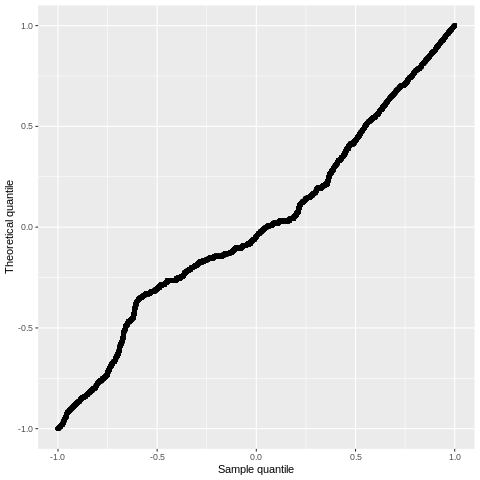

In [27]:
%%R
p2